In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'  # for hi-dpi displays
%matplotlib inline

In [2]:
sns.set(font_scale=1.3)
sns.set_style('whitegrid')
colors = np.array(sns.color_palette("Set1", 9))[(1,0,2,3,4,8,6,7), :]
sns.set_palette(colors, 8)

In [3]:
save_figures = True

def savefig(filename, **kwargs):
    if not save_figures:
        return
    import os
    dir_ = 'figures/'
    kwargs_ = dict(dpi=300, bbox_inches='tight')
                   #frameon=True, facecolor='white', transparent=False)
    kwargs_.update(kwargs)
    plt.savefig(dir_ + filename, **kwargs_)
    print('Saved: %s' % (dir_ + filename))

In [4]:
fs = [f for f in Path('results').glob('singlespot_*_histfit_*window30s*')]
[f.stem for f in fs]

['singlespot_bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1_histfit_ampl_only__window30s_step10s',
 'singlespot_bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2_histfit_ampl_only__window30s_step10s',
 'singlespot_bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_3_histfit_ampl_only__window30s_step10s']

In [5]:
df_alex = pd.read_csv(fs[0], index_col=0)
df_alex.head()

,p1_center,p1_sigma,p2_amplitude,p2_center,p2_sigma,tmean,tstart,tstop,kinetics
-585.0,0.559,0.1267,0.1258,0.902,0.0875,-585.0,-600,-570,0.1258
-575.0,0.559,0.1267,0.1367,0.902,0.0875,-575.0,-590,-560,0.1367
-565.0,0.559,0.1267,0.1609,0.902,0.0875,-565.0,-580,-550,0.1609
-555.0,0.559,0.1267,0.2044,0.902,0.0875,-555.0,-570,-540,0.2044
-545.0,0.559,0.1267,0.1832,0.902,0.0875,-545.0,-560,-530,0.1832


In [6]:
fm = [f for f in Path('results').glob('multispot_*_histfit_*window30s*')]
[f.stem for f in fm]

['multispot_2015-07-29_bubble-bubble-open-complex-run-off-kinetics-600mW-steer110_7_histfit_ampl_only__window30s_step1s',
 'multispot_2015-07-30_bubble-bubble-run-off-kinetics-800mW-steer110_8_histfit_ampl_only__window30s_step1s',
 'multispot_2015-07-31_bubble-bubble-run-off-kinetics-800mW-steer110_12_histfit_ampl_only__window30s_step1s']

In [7]:
df_mspot = pd.read_csv(fm[1], index_col=0)
df_mspot.index.name = 'Time (s)'
df_mspot.head()

,p1_center,p1_sigma,p2_amplitude,p2_center,p2_sigma,p3_amplitude,p3_center,p3_sigma,tmean,tstart,tstop,kinetics
Time (s),,,,,,,,,,,,
-885.0,0.071,0.0576,0.6834,0.617,0.2057,0.1264,0.936,0.0513,-885.0,-900,-870,0.1561
-884.0,0.071,0.0576,0.6970,0.617,0.2057,0.1200,0.936,0.0513,-884.0,-899,-869,0.1469
-883.0,0.071,0.0576,0.6978,0.617,0.2057,0.1207,0.936,0.0513,-883.0,-898,-868,0.1474
-882.0,0.071,0.0576,0.6964,0.617,0.2057,0.1163,0.936,0.0513,-882.0,-897,-867,0.1431
-881.0,0.071,0.0576,0.6916,0.617,0.2057,0.1165,0.936,0.0513,-881.0,-896,-866,0.1441


Saved: figures/Multi-spot vs single-spot kinetics.png


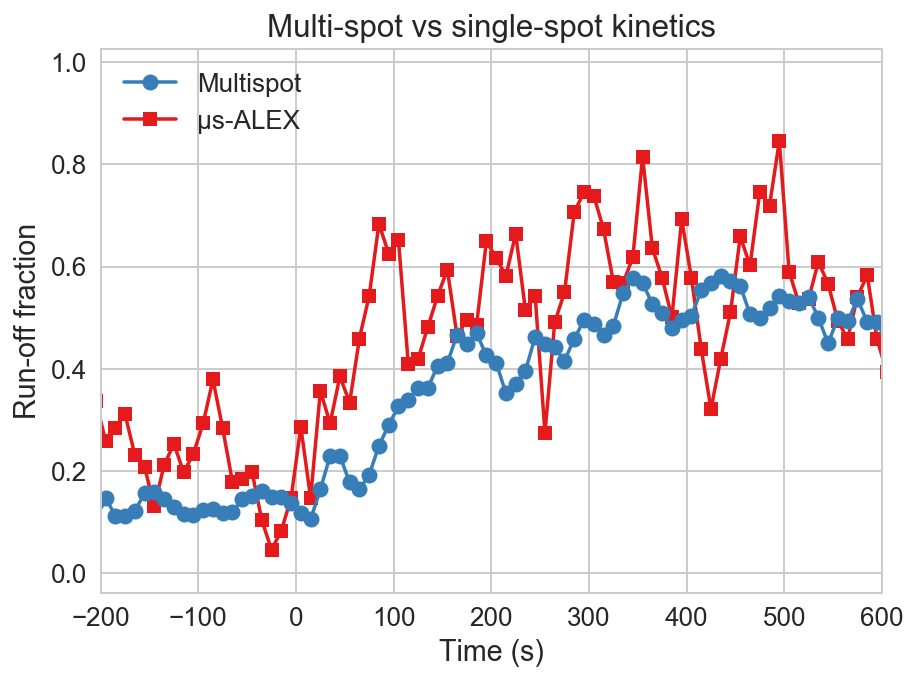

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))
sty = dict(lw=0)
df_mspot.kinetics[::10].plot(ms=8, marker='o', zorder=2)
df_alex.kinetics.plot(ms=7, marker='s', zorder=1)
plt.ylabel('Run-off fraction')
plt.title('Multi-spot vs single-spot kinetics')
plt.xlim(-200, 600)
plt.legend(['Multispot', 'μs-ALEX'])
savefig('Multi-spot vs single-spot kinetics.png')